In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [ ]:
!pip install SpacyTextBlob

In [ ]:
!pip3 install spacymoji==2.0.0
!pip3 uninstall spacy -y
!pip3 install spacy==3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
submissions_json = "/content/drive/MyDrive/stocks/submissions_stocks_20211126.json"

In [4]:
from pathlib import Path
# read json
p = Path(submissions_json)

with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())



In [5]:
list(data[0].keys())

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'removed_by_category',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thumbnail',
 'title',
 'total_awards_received',
 'treatment_t

In [6]:
len(data)

154506

In [7]:
a = set([1, 2, 3,5])
b = set([2, 3, 4,10])

print(list(b-a)[0])

10


In [13]:
cols = [
 'author', 
 'created_utc',  
 'id', 
'link_flair_text',
 'num_comments', 
 'score',
  'subreddit_subscribers',   
 'selftext', 
 'title', 'upvote_ratio'

]


df_data = []

for doc in data:
  #cols =list(doc.keys())
  #print(list(doc.keys()))
  #print(list(doc.values()))
  #df_data.append(list(doc.values()))
  #break
    if  doc.keys() >= set(cols):
        lst =  [doc['author'], doc['created_utc'],doc['id']
                ,doc[ 'link_flair_text'], 
                doc['num_comments'],doc[ 'score'],
                doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                doc['upvote_ratio']          
                ]
        df_data.append(lst)
    else:
      missing_keys = list(set(cols) - doc.keys())
      if (len(missing_keys) == 1) and (missing_keys[0] == 'selftext'):
        #print('selftext')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'upvote_ratio'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'link_flair_text'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                   doc['upvote_ratio']            
                  ]
        df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'upvote_ratio') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,doc[ 'link_flair_text'],
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'selftext') and (missing_keys[1] == 'link_flair_text')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id'],
                 "NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']        
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']           
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 3) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0           
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'upvote_ratio') and (missing_keys[1] == 'link_flair_text')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0           
                  ]
          df_data.append(lst)
      else:
        print(missing_keys)
        #print(doc) 
        #print(doc.values()) 
        

df = pd.DataFrame(data=df_data,columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154506 entries, 0 to 154505
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   author                 154506 non-null  object 
 1   created_utc            154506 non-null  int64  
 2   id                     154506 non-null  object 
 3   link_flair_text        154506 non-null  object 
 4   num_comments           154506 non-null  int64  
 5   score                  154506 non-null  int64  
 6   subreddit_subscribers  154506 non-null  int64  
 7   selftext               154506 non-null  object 
 8   title                  154506 non-null  object 
 9   upvote_ratio           154506 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 11.8+ MB


In [14]:
df.to_csv("/content/drive/MyDrive/stocks/stocks_submissions_all.csv", sep=";")

In [15]:
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
0,NovelAnteater,1637932772,r2nb9a,NA,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0
1,VonDerBerg,1637930270,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0
2,VonDerBerg,1637930184,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0
3,VonDerBerg,1637929776,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0
4,ghdsvor,1637928601,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0


In [16]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [17]:
#set created_utc as index
#df.set_index('created_utc')

df.index = pd.DatetimeIndex(df.created_utc)


In [18]:
df.tail()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,
2018-12-30 02:45:51,ChowSu,2018-12-30 02:45:51,aarxpu,NA,13,1,306865,NA,Stocks and taxes?,0.0
2018-12-30 02:29:05,analyst_84,2018-12-30 02:29:05,aart2j,NA,25,1,306864,NA,Best of 2018 returns,0.0
2018-12-30 01:57:05,01Cloud01,2018-12-30 01:57:05,aark2v,NA,9,1,306855,NA,Best bear ETFs,0.0
2018-12-30 01:32:01,SilverInitiatives,2018-12-30 01:32:01,aarcpu,NA,34,1,306853,NA,Theoretical: Shouldn't stock prices be infinity?,0.0
2018-12-30 00:26:31,19392o3o3u2,2018-12-30 00:26:31,aaqssi,NA,4,1,306831,NA,I need advice from a profesional,0.0


# 3. Exploratory Data Analysis

## 3.1. Number of submissions

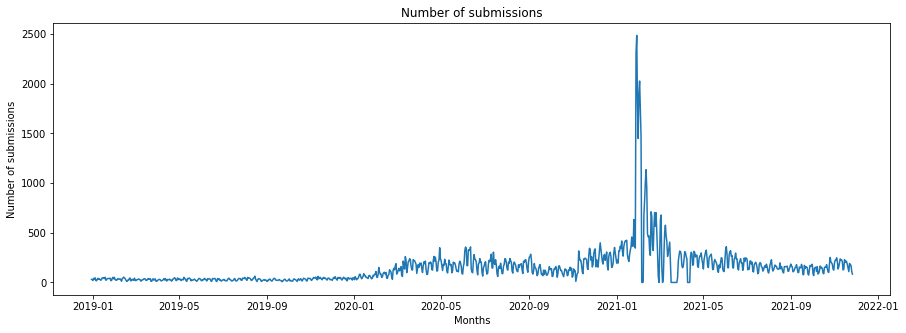

In [19]:
df_submissions = df.groupby(pd.Grouper(freq="D"))["id"].count()
 

plt.figure(figsize=(15,5))
plt.plot(df_submissions)
plt.xlabel("Months")
plt.ylabel("Number of submissions")
plt.title("Number of submissions")
plt.show()

## 3.2. Number of subscribers

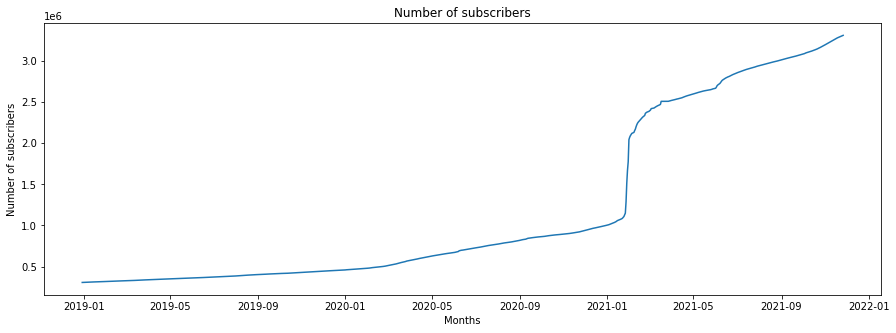

In [20]:
df_subscribers = df.groupby(pd.Grouper(freq="D"))["subreddit_subscribers"].nth(-1)
# print(df_subscribers)

plt.figure(figsize=(15,5))
plt.plot(df_subscribers)
plt.xlabel("Months")
plt.ylabel("Number of subscribers")
plt.title("Number of subscribers")
plt.show()

## 3.3. Number of submissions by flair

In [21]:
df_flairs = df.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False)
print(f"{len(df_flairs)} flair categories:\n{df_flairs.index.values}\n")
print(f"Top 15 flair count:\n{df_flairs.head(15)}")

43 flair categories:
['NA' 'Advice Request' 'Question' 'Advice' 'Discussion'
 'Company Discussion' 'Ticker Discussion' 'Trades' 'Company News' 'News'
 'Company Analysis' 'Industry Discussion' 'Resources' 'Industry Question'
 'Company Question' 'Ticker News' 'Ticker Question' 'ETFs' 'Off-Topic'
 'Industry News' 'Meta' 'Use the stickied threads'
 'already posted recently' 'Rule 3: Low Effort' 'Correction / False'
 'Read the wiki' 'AMA' 'Rule 7' 'Rule 7:  Penny stock' 'Off topic'
 'Rule 7: Penny stock' 'BANKRUPTCY!!!' 'Rule 2' 'already posted'
 'Rule 7:  Pump and dump' 'FYI' 'Rule 7: Pump &amp; dump'
 'Off topic: Political Bullshit' 'PSA' 'Rule 5: Trolling'
 'Rule 7: Pump and dump' 'circumventing auotmod'
 'Market News &amp; Analysis']

Top 15 flair count:
link_flair_text
NA                     86559
Advice Request         14347
Question                9806
Advice                  8297
Discussion              7563
Company Discussion      3743
Ticker Discussion       3219
Trades           

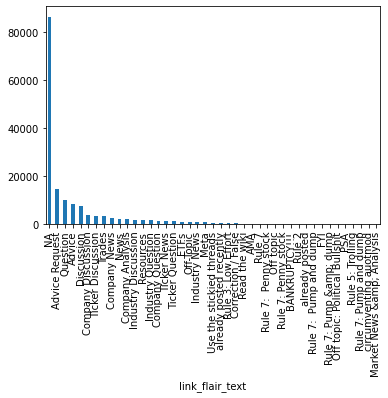

In [22]:
df_flairs.plot.bar()

## 3.4. Top authors by submissions

In [23]:
df_authors = df.groupby("author")["author"].count().sort_values(ascending=False)
print(f"Top 15 authors:\n{df_authors.head(15)}")


Top 15 authors:
author
[deleted]               3871
coolcomfort123          1016
AutoModerator            914
bigbear0083              330
psychotrader00           226
luchins                  181
gorays21                 179
apooroldinvestor         149
InterestingNews1         137
0toHeroInvesting         128
NXTmine                  121
rammerman123             118
Brothanogood             107
Ok-Length1319            100
QuantalyticsResearch      90
Name: author, dtype: int64


In [24]:

df.tail()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,
2018-12-30 02:45:51,ChowSu,2018-12-30 02:45:51,aarxpu,NA,13,1,306865,NA,Stocks and taxes?,0.0
2018-12-30 02:29:05,analyst_84,2018-12-30 02:29:05,aart2j,NA,25,1,306864,NA,Best of 2018 returns,0.0
2018-12-30 01:57:05,01Cloud01,2018-12-30 01:57:05,aark2v,NA,9,1,306855,NA,Best bear ETFs,0.0
2018-12-30 01:32:01,SilverInitiatives,2018-12-30 01:32:01,aarcpu,NA,34,1,306853,NA,Theoretical: Shouldn't stock prices be infinity?,0.0
2018-12-30 00:26:31,19392o3o3u2,2018-12-30 00:26:31,aaqssi,NA,4,1,306831,NA,I need advice from a profesional,0.0


# 2. Find Sentiment

## 2.1. Intialize pipline

<!-- ![nlp_pipeline](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg) -->

In [ ]:
!pip install SpacyTextBlob

In [26]:
# nlp = spacy.load("en_core_web_lg")
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.blank("en")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")
    nlp.rename_pipe("spacytextblob", "sentiment")
print(nlp.pipe_names)

['sentiment']


## 2.2. Find sentiment

In [27]:
import re
df["title_polarity"] = 0.0
df["title_subjectivity"] = 0.0
df["body_polarity"] = 0.0
df["body_subjectivity"] = 0.0
df["polarity"] = 0.0
df["title_tokens"] = ""
df['title_tokens'] = df['title_tokens'].apply(list)
df["selftext_tokens"] ="" 
df['selftext_tokens'] = df['selftext_tokens'].apply(list)

def get_sentiment(title, body):
    title = re.sub(r"http\S+","",title) 
    body = re.sub(r"http\S+","",str(body)) 
    nlp_title = nlp(title)
    nlp_body = nlp(body)
    title_tokens = [token.text for token in nlp_title]
    body_tokens = [token.text for token in nlp_body]
    #ngrams = ngrams.append(list(textacy.extract.basics.ngrams(nlp_title, 3)))
    #print(pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
    #                  nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens]))
    return pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
                      nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens])

df[["title_polarity", "title_subjectivity", "body_polarity", "body_subjectivity","title_tokens","selftext_tokens"]] = df.apply(lambda row: get_sentiment(row["title"], row["selftext"]), axis=1)
df["polarity"] = (df["title_polarity"] + df["body_polarity"])
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens
created_utc,,,,,,,,,,,,,,,,,
2021-11-26 13:19:32,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NA,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"[SNAP, seems, like, a, great, long, -, term, b...","[[, removed, ]]"
2021-11-26 12:37:50,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant]","[So, the, markets, are, tanking, on, new, vari..."
2021-11-26 12:36:24,VonDerBerg,2021-11-26 12:36:24,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"[$, NVAX, new, variant]","[[, removed, ]]"
2021-11-26 12:29:36,VonDerBerg,2021-11-26 12:29:36,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"[$, NVAX, lift, -, off, confirmed]","[[, removed, ]]"
2021-11-26 12:10:01,ghdsvor,2021-11-26 12:10:01,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, to, find, dates, that, annual, reports...","[[, removed, ]]"


## 2.3. Group by day

In [28]:
df_polarity = df.groupby(pd.Grouper(freq="D"))[["polarity"]].mean()
df_polarity = df_polarity.fillna(0)
display(df_polarity.head())

,polarity
created_utc,
2018-12-30,0.167870
2018-12-31,0.130366
2019-01-01,-0.000625
2019-01-02,0.136519
2019-01-03,0.146538


##  choice of words, n-grams/phrases, ticker extraction

In [29]:
pip install textacy

     |████████████████████████████████| 200 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 35.8 MB/s 
     |████████████████████████████████| 137 kB 61.2 MB/s 
     |████████████████████████████████| 481 kB 50.2 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1231130 sha256=67f8cf6760c13e4cad0c8937fb15e90718abf5c9b367e2ac2470a9698c91e927
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.8.9-cp37-cp37m-linux_x86_64.whl size=73236 sha256=c64b43dcd6e26b85756784ecda2b8c7245d6ddf20f8355d568427dd284d299c2
  Stored in directory: /root/.cache/pip/wheels/32/a9/ef/5d8742e72deaf0d1de327a180d008c2c0299367581800ea73f
Successfully built cytoolz jellyfish


In [30]:
import textacy
bigrams_title = []
trigrams_title = []

def get_ngrams(title,n):
    nlp_title = nlp(str(title)) 
    f.write("%s\n" % list(textacy.extract.basics.ngrams(nlp_title, n, filter_stops=True, filter_punct=True, filter_nums=False)))




In [31]:
with open('/content/drive/MyDrive/stocks/bigrams_title.txt', 'a') as f: 
 df.apply(lambda row: get_ngrams(row["title"],2), axis=1)
    
with open('/content/drive/MyDrive/stocks/trigrams_title.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["title"],3), axis=1)

In [32]:
    
with open('/content/drive/MyDrive/stocks/bigrams_selftext.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["selftext"],2), axis=1)
 
with open('/content/drive/MyDrive/stocks/trigrams_selftext.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["selftext"],3), axis=1)

##Frequency of N-grams

In [33]:
# read a line from a file as a list of ngrams
# create a list of all ngrams
# calculate freq.
# wordcloud 

import ast
bigrams_title = []
with open('/content/drive/MyDrive/stocks/bigrams_title.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 


In [34]:
import re
bigrams_title = []
for lst in lines:  
  for bigram in lst.split(','):    
    bigram=re.sub('[[]', '', bigram)
    bigram=re.sub('[]]', '', bigram)
    if bigram != '':      
      bigrams_title.append(bigram.lower())
print(bigrams_title[0:50])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


['great long', ' term buy', '$nvax', ' nvax new', ' new variant', '$nvax', ' nvax new', ' new variant', '$nvax', ' nvax lift', 'find dates', ' annual reports', 'nasdaq tech', ' tech companies', 'stocks daily', ' daily thread', ' meme stocks', ' stocks friday', ' nov 26', 'individual short', ' short stocks', 'intel returning', ' gpu market', 'stocks fungible', ' long term', ' term capital', ' capital gains', ' gains tax', 'new phone', ' need stock', ' stock app', 'stocks daily', ' daily discussion', ' fundamentals friday', ' friday nov', ' nov 26', 'centric swap', 'knight swap', 'passive income', 'crsr buy', 'market finally', ' finally crashing', ' new variant', 'cruise stocks', 'anybody knows', ' custodial account', 'guys think', 'reacting like', ' like usual', ' 2021 market']


In [35]:
count_freq = {}
for item in bigrams_title:
    item = item.strip()
    if item in count_freq:
        count_freq[item] +=1
    else:
        count_freq[item] = 1

In [36]:
sorted_two_grams = sorted(count_freq.items(), key=lambda item: item[1], reverse = True)
print(sorted_two_grams[:100])

[('stock market', 2091), ('long term', 1911), ('🚀🚀', 1499), ('stocks daily', 784), ('$$', 683), ('daily discussion', 590), ('000', 559), ('need help', 541), ('short squeeze', 513), ('stock price', 495), ('day trading', 479), ('s&amp;p 500', 470), ('short term', 449), ('guys think', 421), ('wall street', 398), ('new investor', 396), ('good time', 392), ('stock trading', 388), ('good buy', 384), ('market cap', 374), ('free stock', 371), ('meme stocks', 356), ('roth ira', 356), ('capital gains', 294), ('year old', 294), ('buy stocks', 294), ('$gme', 291), ('options trading', 277), ('$1', 277), ('start investing', 274), ('$100', 269), ('market crash', 265), ('need advice', 265), ('td ameritrade', 257), ('wash sale', 256), ('best way', 254), ('growth stocks', 243), ('market recap', 241), ('index funds', 240), ('best stocks', 236), ('trading platform', 236), ('market news', 236), ('good stock', 235), ('tesla stock', 235), ('short interest', 232), ('earnings report', 230), ('tech stocks', 229

In [37]:
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

#word_fd = nltk.FreqDist(filtered_sentence)
bigram_fd = nltk.FreqDist(nltk.bigrams(bigrams_title))



In [39]:
bigram_fd.most_common(10)

[((' 🚀🚀', ' 🚀🚀'), 907),
 (('stocks daily', ' daily discussion'), 586),
 ((' $$', ' $$'), 441),
 (('stocks daily', ' daily thread'), 196),
 ((' daily thread', ' meme stocks'), 196),
 ((' trading week', ' week beginning'), 144),
 ((' week ahead', ' trading week'), 135),
 (('wall street', ' street week'), 130),
 ((' street week', ' week ahead'), 130),
 ((' daily discussion', ' discussion wednesday'), 122)]

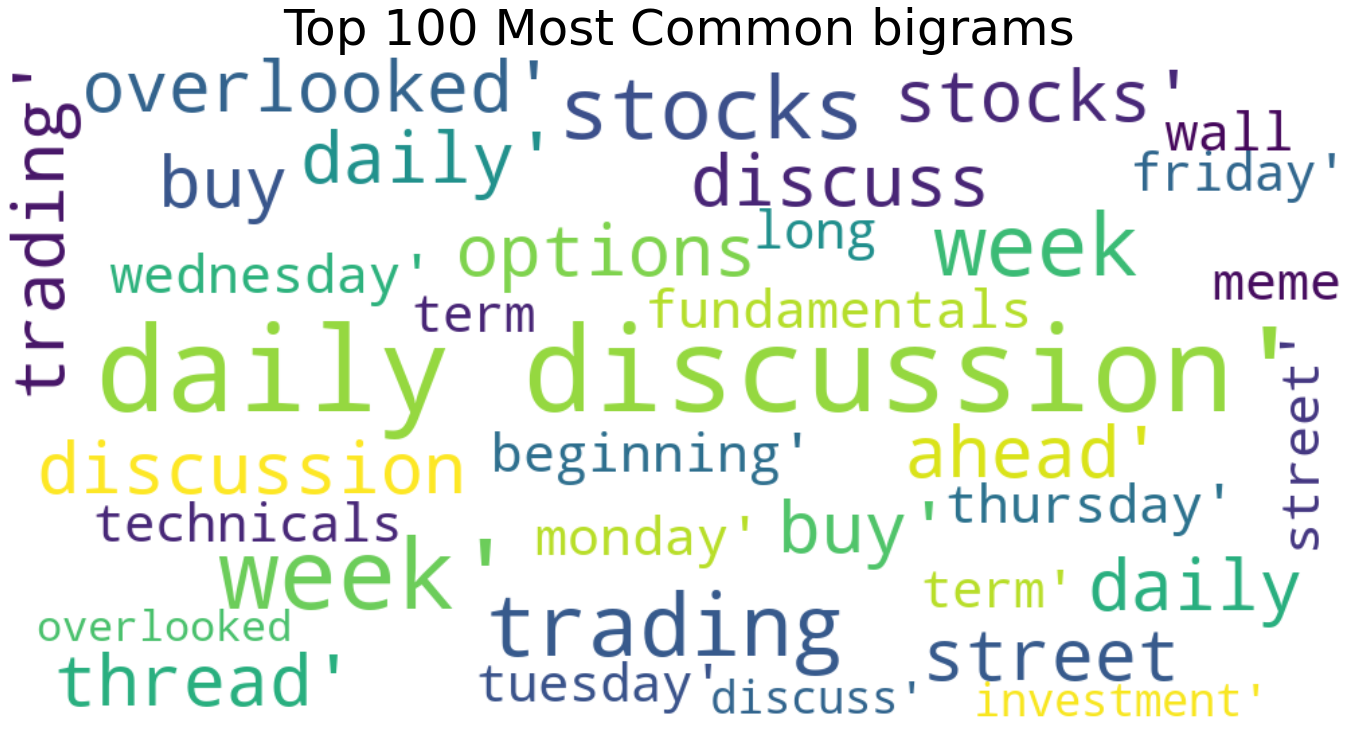

In [40]:
mostcommon = bigram_fd.most_common(20)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common bigrams', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [41]:
with open('/content/drive/MyDrive/stocks/trigrams_title.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 

trigrams_title = []
for lst in lines:  
  for trigram in lst.split(','):    
    trigram=re.sub('[[]', '', trigram)
    trigram=re.sub('[]]', '', trigram)
    if trigram != '':      
      trigrams_title.append(trigram.lower())
print(trigrams_title[0:50])

['snap seems like', ' like a great', '$nvax new', ' nvax new variant', '$nvax new', ' nvax new variant', '$nvax lift', 'dates that annual', ' reports were published', 'nasdaq tech companies', ' companies and inflation', 'stocks daily thread', ' thread on meme', ' meme stocks friday', 'individual short stocks', 'impact of intel', ' market on nvidia', ' nvidia being underestimated', 'long term capital', ' term capital gains', ' capital gains tax', 'need stock app', 'stocks daily discussion', ' fundamentals friday nov', ' friday nov 26', 'buy or pass', 'market finally crashing', 'open a custodial', 'market over reacting', ' reacting like usual', ' finally the catalyst', ' 2021 market crash', 'market analysis】november 26th', 'buckle up- massive', ' up- massive red', ' massive red day', ' red day incoming', 'added new \\/irus', ' new \\/irus variant', 'stocks would profit', ' profit from new', 'china regulator seeks', ' seeks to avoid', ' avoid us delistings', 'day another dip', 'mercadolib

In [42]:
count_freq_trigrams = {}
for item in trigrams_title:
    item = item.strip()
    if item in count_freq_trigrams:
        count_freq_trigrams[item] +=1
    else:
        count_freq_trigrams[item] = 1

In [43]:
sorted_tri_grams = sorted(count_freq_trigrams.items(), key=lambda item: item[1], reverse = True)
print(sorted_tri_grams[:100])

[('🚀🚀🚀', 966), ('new to stocks', 652), ('stocks daily discussion', 586), ('$$$', 460), ('time to buy', 404), ('stocks to buy', 378), ('new to investing', 355), ('thoughts on $', 309), ('000', 292), ('stocks to invest', 227), ('looking for advice', 227), ('rate my portfolio', 213), ('thread on meme', 197), ('stocks daily thread', 196), ('recap for today', 195), ('new to trading', 169), ('investing in stocks', 167), ('hold or sell', 167), ('invest in stocks', 161), ('help me understand', 156), ('long term investment', 151), ('buy and hold', 147), ('trading week beginning', 146), ('buy the dip', 142), ('stock to buy', 134), ('wall street week', 130), ('street week ahead', 130), ('time to invest', 129), ('time to sell', 127), ('looking to invest', 123), ('daily discussion wednesday', 122), ('want to invest', 122), ('options trading thursday', 121), ('stock market news', 118), ('capital gains tax', 116), ('daily discussion monday', 115), ('buy buy buy', 110), ('want to start', 109), ('need 

In [44]:
trigram_fd = nltk.FreqDist(nltk.trigrams(trigrams_title))
trigram_fd.most_common(10)

[((' 🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 383),
 ((' $$$', ' $$$', ' $$$'), 183),
 (('wall street week', ' street week ahead', ' trading week beginning'), 130),
 ((' =$$', ' $$$', ' $$$'), 59),
 ((' buy buy buy', ' buy buy buy', ' buy buy buy'), 55),
 (('stocks daily thread', ' thread on meme', ' meme stocks friday'), 39),
 (('stocks daily thread', ' thread on meme', ' meme stocks thursday'), 39),
 (('stocks daily thread', ' thread on meme', ' meme stocks wednesday'), 39),
 (('stocks daily thread', ' thread on meme', ' meme stocks tuesday'), 37),
 (('stocks daily thread', ' thread on meme', ' meme stocks monday'), 36)]

## Extract Tickers 

In [45]:
nasdaq_stocks = pd.read_csv("/content/drive/MyDrive/WSB/nasdaq.csv", sep=",")
nasdaq_stocks_symbols = nasdaq_stocks["Symbol"].tolist()

In [46]:
# Function to find stocks in a text given stock list
regex = re.compile("[^a-zA-Z ]")
ticker_set = set(nasdaq_stocks_symbols)


def calculate_mentioned_stocks(title, body=""):
    content = regex.sub("", str(title) + " " + str(body)).split(" ")
    content = set(content)
    tickers = str(list(ticker_set & content))    
    return pd.Series([tickers])

def sanitize_column(column):
    column = column.replace("[],", "").replace("[]", "").replace("],[", ",")
    return column

In [47]:
df[["tickers"]] = df.apply(lambda x: calculate_mentioned_stocks(x["title"],x["selftext"]), axis=1)


In [48]:
df.head(10)

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
created_utc,,,,,,,,,,,,,,,,,,
2021-11-26 13:19:32,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NA,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"[SNAP, seems, like, a, great, long, -, term, b...","[[, removed, ]]",['SNAP']
2021-11-26 12:37:50,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant]","[So, the, markets, are, tanking, on, new, vari...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'..."
2021-11-26 12:36:24,VonDerBerg,2021-11-26 12:36:24,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"[$, NVAX, new, variant]","[[, removed, ]]",['NVAX']
2021-11-26 12:29:36,VonDerBerg,2021-11-26 12:29:36,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"[$, NVAX, lift, -, off, confirmed]","[[, removed, ]]",['NVAX']
2021-11-26 12:10:01,ghdsvor,2021-11-26 12:10:01,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, to, find, dates, that, annual, reports...","[[, removed, ]]",[]
2021-11-26 12:07:40,GreenPaperHands,2021-11-26 12:07:40,r2lpz7,NA,0,1,3310472,Looks like all of the markets are going to tak...,Be greedy when others are fearful. Be fearful ...,1.0,-0.900000,1.000000,0.051623,0.494414,-0.848377,"[Be, greedy, when, others, are, fearful, ., Be...","[Looks, like, all, of, the, markets, are, goin...",[]
2021-11-26 12:04:57,Eadw7cer,2021-11-26 12:04:57,r2loi2,ETFs,0,1,3310461,"As many of you know, a lot of nasdaq companies...",Nasdaq Tech companies and inflation,1.0,0.000000,0.000000,0.190783,0.470202,0.190783,"[Nasdaq, Tech, companies, and, inflation]","[As, many, of, you, know, ,, a, lot, of, nasda...",[]
2021-11-26 12:00:12,AutoModerator,2021-11-26 12:00:12,r2lli5,NA,0,1,3310456,The meme stock scheduled posts will run Mon to...,r/Stocks Daily Thread on Meme Stocks Friday - ...,1.0,0.000000,0.000000,0.230388,0.488910,0.230388,"[r, /, Stocks, Daily, Thread, on, Meme, Stocks...","[The, meme, stock, scheduled, posts, will, run...","['GME', 'TALK']"
2021-11-26 11:39:51,sanemonk1,2021-11-26 11:39:51,r2lal9,NA,0,1,3310411,[removed],How can an individual short stocks?,1.0,0.000000,0.350000,0.000000,0.000000,0.000000,"[How, can, an, individual, short, stocks, ?]","[[, removed, ]]",[]


In [49]:
df["tickers"] = df["tickers"].apply(sanitize_column)

In [50]:
df.head(10)

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens,tickers
created_utc,,,,,,,,,,,,,,,,,,
2021-11-26 13:19:32,NovelAnteater,2021-11-26 13:19:32,r2nb9a,NA,0,1,3310630,[removed],SNAP seems like a great long-term buy at this ...,1.0,0.800000,0.750000,0.000000,0.000000,0.800000,"[SNAP, seems, like, a, great, long, -, term, b...","[[, removed, ]]",['SNAP']
2021-11-26 12:37:50,VonDerBerg,2021-11-26 12:37:50,r2ma8u,Trades,0,1,3310546,So the markets are tanking on new variant news...,$NVAX new variant,1.0,0.136364,0.454545,0.094084,0.514141,0.230447,"[$, NVAX, new, variant]","[So, the, markets, are, tanking, on, new, vari...","['WE', 'NOW', 'NVAX', 'YOU', 'AN', 'FOR', 'UK'..."
2021-11-26 12:36:24,VonDerBerg,2021-11-26 12:36:24,r2m96j,Trades,0,1,3310543,[removed],$NVAX new variant,1.0,0.136364,0.454545,0.000000,0.000000,0.136364,"[$, NVAX, new, variant]","[[, removed, ]]",['NVAX']
2021-11-26 12:29:36,VonDerBerg,2021-11-26 12:29:36,r2m3di,Trades,0,1,3310525,[removed],$NVAX lift-off confirmed,1.0,0.400000,1.000000,0.000000,0.000000,0.400000,"[$, NVAX, lift, -, off, confirmed]","[[, removed, ]]",['NVAX']
2021-11-26 12:10:01,ghdsvor,2021-11-26 12:10:01,r2lrdw,Advice Request,0,1,3310479,[removed],Where to find dates that annual reports were p...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,"[Where, to, find, dates, that, annual, reports...","[[, removed, ]]",
2021-11-26 12:07:40,GreenPaperHands,2021-11-26 12:07:40,r2lpz7,NA,0,1,3310472,Looks like all of the markets are going to tak...,Be greedy when others are fearful. Be fearful ...,1.0,-0.900000,1.000000,0.051623,0.494414,-0.848377,"[Be, greedy, when, others, are, fearful, ., Be...","[Looks, like, all, of, the, markets, are, goin...",
2021-11-26 12:04:57,Eadw7cer,2021-11-26 12:04:57,r2loi2,ETFs,0,1,3310461,"As many of you know, a lot of nasdaq companies...",Nasdaq Tech companies and inflation,1.0,0.000000,0.000000,0.190783,0.470202,0.190783,"[Nasdaq, Tech, companies, and, inflation]","[As, many, of, you, know, ,, a, lot, of, nasda...",
2021-11-26 12:00:12,AutoModerator,2021-11-26 12:00:12,r2lli5,NA,0,1,3310456,The meme stock scheduled posts will run Mon to...,r/Stocks Daily Thread on Meme Stocks Friday - ...,1.0,0.000000,0.000000,0.230388,0.488910,0.230388,"[r, /, Stocks, Daily, Thread, on, Meme, Stocks...","[The, meme, stock, scheduled, posts, will, run...","['GME', 'TALK']"
2021-11-26 11:39:51,sanemonk1,2021-11-26 11:39:51,r2lal9,NA,0,1,3310411,[removed],How can an individual short stocks?,1.0,0.000000,0.350000,0.000000,0.000000,0.000000,"[How, can, an, individual, short, stocks, ?]","[[, removed, ]]",


In [51]:
df.to_csv("/content/drive/MyDrive/stocks/stocks_submissions_features_tickers.csv", sep=";")